In [1]:
# First we will import the necessary Library 

import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt

# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM


# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [2]:
maindf = pd.read_csv("../data/ETH-USD.csv")

In [3]:
print('Total number of days present in the dataset: ',maindf.shape[0])
print('Total number of fields present in the dataset: ',maindf.shape[1])

Total number of days present in the dataset:  366
Total number of fields present in the dataset:  7


In [4]:
maindf.shape

(366, 7)

In [5]:
maindf.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-06-27,1199.713135,1234.180786,1179.792480,1193.680664,1193.680664,1.249223e+10
1,2022-06-28,1193.254028,1229.739014,1141.159668,1144.579224,1144.579224,1.402321e+10
2,2022-06-29,1144.524414,1152.684814,1092.099121,1098.943848,1098.943848,1.538629e+10
3,2022-06-30,1099.353149,1103.690430,1009.094849,1067.298828,1067.298828,1.635076e+10
4,2022-07-01,1068.316772,1100.223877,1040.150757,1059.767334,1059.767334,1.749945e+10


In [6]:
maindf.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
361,2023-06-23,1872.540771,1932.531616,1865.192017,1892.862061,1892.862061,8.290615e+09
362,2023-06-24,1893.771973,1905.227417,1867.811523,1876.059692,1876.059692,5.026192e+09
363,2023-06-25,1875.849121,1929.079102,1870.850098,1900.506104,1900.506104,6.937582e+09
364,2023-06-26,NaN,NaN,NaN,NaN,NaN,NaN
365,2023-06-27,1859.030029,1888.575562,1857.434937,1878.748535,1878.748535,8.381389e+09


In [7]:
maindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       366 non-null    object 
 1   Open       365 non-null    float64
 2   High       365 non-null    float64
 3   Low        365 non-null    float64
 4   Close      365 non-null    float64
 5   Adj Close  365 non-null    float64
 6   Volume     365 non-null    float64
dtypes: float64(6), object(1)
memory usage: 20.1+ KB


In [8]:
maindf.describe()

,Open,High,Low,Close,Adj Close,Volume
count,365.000000,365.000000,365.000000,365.000000,365.000000,3.650000e+02
mean,1554.819573,1590.209616,1521.631546,1556.804911,1556.804911,1.099113e+10
std,256.297627,260.311321,254.385634,256.397122,256.397122,6.080228e+09
min,1038.186646,1073.052612,1009.094849,1038.191650,1038.191650,2.399675e+09
25%,1306.309570,1335.647827,1275.323975,1309.328735,1309.328735,6.539642e+09
50%,1579.497925,1639.723877,1551.877930,1586.176758,1586.176758,9.249575e+09
75%,1785.416260,1821.458252,1732.524658,1792.119995,1792.119995,1.446744e+10
max,2120.001221,2137.445068,2076.832031,2120.005859,2120.005859,4.204800e+10


In [9]:
print('Null Values:',maindf.isnull().values.sum())

Null Values: 6


In [10]:
print('NA values:',maindf.isnull().values.any())

NA values: True


In [11]:
# If dataset had null values we can use this code to drop all the null values present in the dataset
maindf=maindf.dropna()
print('Null Values:',maindf.isnull().values.sum())
print('NA values:',maindf.isnull().values.any())

Null Values: 0
NA values: False


In [12]:
maindf.shape

(365, 7)

In [13]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

In [14]:
closedf = maindf[['Date','Close']]
close_stock = closedf.copy()
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (365, 2)


In [15]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Whole period of timeframe of Bitcoin close price 2022-2023', plot_bgcolor='white', 
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [16]:
# deleting date column and normalizing using MinMax Scaler

del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)
print(closedf)

(365, 1)
[[0.14372987]
 [0.09834182]
 [0.0561577 ]
 [0.02690589]
 [0.01994398]
 [0.02617933]
 [0.03288487]
 [0.10433162]
 [0.08906277]
 [0.13753041]
 [0.18432161]
 [0.17037544]
 [0.16526555]
 [0.12036259]
 [0.05457954]
 [0.        ]
 [0.06969358]
 [0.14173838]
 [0.18019499]
 [0.2906551 ]
 [0.27772245]
 [0.49964794]
 [0.46660837]
 [0.44555621]
 [0.49782842]
 [0.46145955]
 [0.47245251]
 [0.51883681]
 [0.37639714]
 [0.37309097]
 [0.55281305]
 [0.63529993]
 [0.63709214]
 [0.60803216]
 [0.59467298]
 [0.5518546 ]
 [0.54977443]
 [0.53676764]
 [0.52690578]
 [0.64157319]
 [0.60404682]
 [0.61115779]
 [0.68156293]
 [0.61455412]
 [0.75202472]
 [0.77927657]
 [0.84954958]
 [0.87181781]
 [0.83065127]
 [0.80054088]
 [0.77642514]
 [0.73469915]
 [0.74764794]
 [0.53132567]
 [0.49806347]
 [0.53717849]
 [0.54012436]
 [0.57734336]
 [0.57206455]
 [0.60848284]
 [0.43407748]
 [0.41892902]
 [0.36268308]
 [0.47590954]
 [0.44891924]
 [0.47650815]
 [0.50654272]
 [0.49826375]
 [0.47945481]
 [0.49865305]
 [0.5352042

In [17]:
# we keep the training set as 70% and 30% testing set

training_size=int(len(closedf)*0.70)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (255, 1)
test_data:  (110, 1)


In [18]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [19]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (239, 15)
y_train:  (239,)
X_test:  (94, 15)
y_test (94,)


In [20]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (239, 15, 1)
X_test:  (94, 15, 1)


In [21]:
model=Sequential()

model.add(LSTM(20,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

In [22]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200
8/8 [==============================] - 2s 75ms/step - loss: 0.1789 - val_loss: 0.4675
Epoch 2/200
8/8 [==============================] - 0s 16ms/step - loss: 0.1209 - val_loss: 0.3141
Epoch 3/200
8/8 [==============================] - 0s 36ms/step - loss: 0.0737 - val_loss: 0.1670
Epoch 4/200
8/8 [==============================] - 0s 16ms/step - loss: 0.0341 - val_loss: 0.0464
Epoch 5/200
8/8 [==============================] - 0s 17ms/step - loss: 0.0133 - val_loss: 0.0059
Epoch 6/200
8/8 [==============================] - 0s 11ms/step - loss: 0.0153 - val_loss: 0.0076
Epoch 7/200
8/8 [==============================] - 0s 10ms/step - loss: 0.0124 - val_loss: 0.0098
Epoch 8/200
8/8 [==============================] - 0s 9ms/step - loss: 0.0115 - val_loss: 0.0157
Epoch 9/200
8/8 [==============================] - 0s 9ms/step - loss: 0.0118 - val_loss: 0.0134
Epoch 10/200
8/8 [==============================] - 0s 9ms/step - loss: 0.0114 - val_loss: 0.0066
Epoch 11/200
8/8 [====

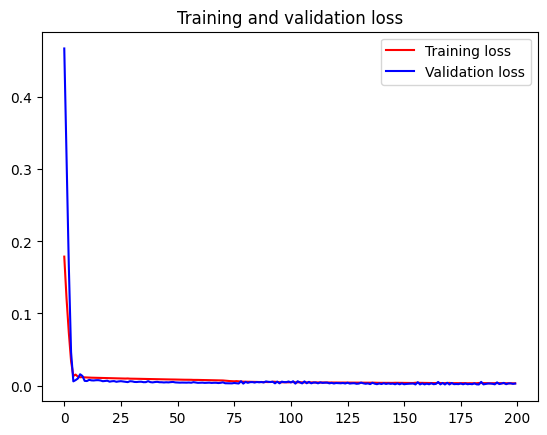

<Figure size 640x480 with 0 Axes>

In [23]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [24]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

3/3 [==============================] - 0s 2ms/step


((239, 1), (94, 1))

In [25]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [26]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  59.97714250892339
Train data MSE:  3597.2576235357055
Train data MAE:  40.2875981604341
-------------------------------------------------------------------------------------
Test data RMSE:  57.38260842255466
Test data MSE:  3292.763749376241
Test data MAE:  46.52705160139626


In [27]:
print("Train data explained variance regression score:", 
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", 
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9097319936127766
Test data explained variance regression score: 0.7750441790583767


In [28]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (365, 1)
Test predicted data:  (365, 1)


In [29]:
model.save("../models/eth_usd_model.h5")